<a href="https://colab.research.google.com/github/tanyasosa/SeriesDeTiempo_TSC_A01177961/blob/main/SituacionProblema-Tipodecambio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Series de tiempo
## Tanya Sosa Cavazos A01177961
### Situacion Problema - Tipo de cambio
#### Marzo 7, 2023


In [ ]:
# importamos las librerias de siempre
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

In [ ]:
# importamos las librerias de series de tiempo
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
#tamaño de graficas
plt.rcParams['figure.figsize']=[12,6]

In [ ]:
procesos=pd.read_csv('/content/MXN=X.csv')

In [ ]:
procesos.head()

,Date,tipo_cambio
0,6/21/22,20.268499
1,6/22/22,20.136999
2,6/23/22,20.049500
3,6/24/22,20.009899
4,6/27/22,19.892559


Graficamos el proceso de Tipo de cambio

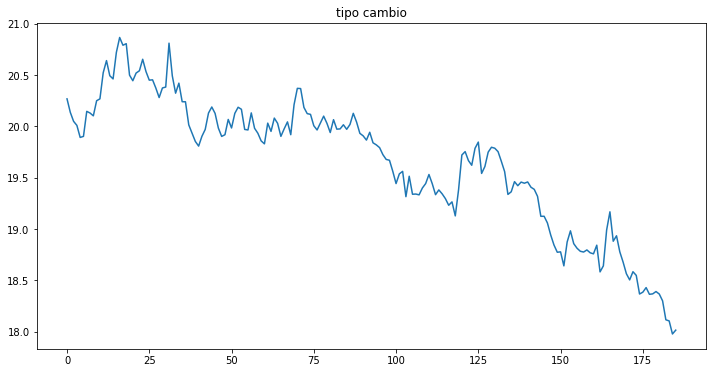

In [ ]:
# figsize=( 12,6)
procesos['tipo_cambio'].plot()
plt.title('tipo cambio')
plt.show()

**El tipo de cambio no es estacionario**
El tipo de cambio no es estacionario ya que la inflación, el crecimeinto economico, tasas de interes, etc, son factores que influyen ya sea en el aumento o disminuyo de valor de la moneda.
El tipo de cambio es considerado una caminata aleatoria ya que no se puede predecir.

El prónostico de la serie lo vamos a realizar en varios pasos:
1. Graficar la serie
2. Realizar la prueba de raices unitarias para verificar que el proceso sea estacionario
3. Si el proceso no es estacionario, lo hacemos estacionario. Si ya es estacionario procedemos al siguiente paso
4. Identificar qué tipo de proceso estacionario es
5. Identificado el proceso, realizar el pronóstico de la serie

## **Tipo de cambio**

In [ ]:
# importamos la base de datos
tipo_cambio = pd.read_csv('/content/MXN=X.csv', index_col = 'Date', parse_dates=True)

In [ ]:
# vemos el dataframe
tipo_cambio.tail()

,tipo_cambio
Date,
2023-03-01,18.300940
2023-03-02,18.115971
2023-03-03,18.105301
2023-03-06,17.978001
2023-03-07,18.015200


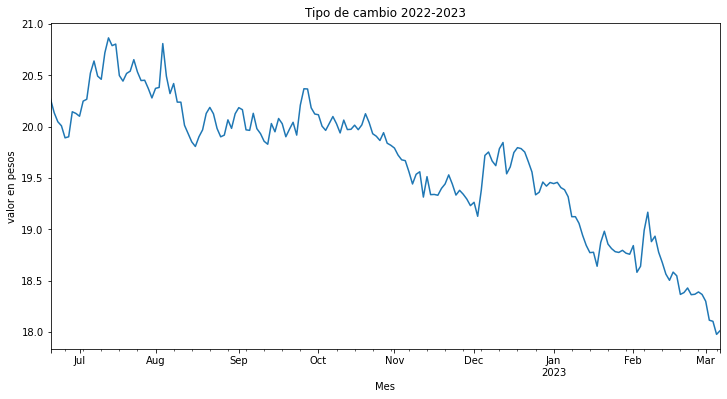

In [ ]:
# comenzamos graficando la serie
# titulo y nombre a ejes
tipo_cambio['tipo_cambio'].plot();
plt.ylabel('valor en pesos')
plt.xlabel('Mes')
plt.title('Tipo de cambio 2022-2023')
plt.show()

In [ ]:
## vamos a verificar que la serie sea estacionaria
## Dickey Fuller Aumentada (Aumented Dickey fuller)
result_adf = adfuller(tipo_cambio)
print('p-value: %.2f' % result_adf[1])

p-value: 0.98


Recuerde que

 **$H_0:$ serie No estacionaria**

 **$H_a:$ serie estacionaria**

regla de decisión si el p-valor$< \alpha $ entonces rechazar $H_0$

con un $\alpha=0.05$

conclusión: 0.98>0.05, No rechazamos H0, la serie es no estacionaria





**¿Cómo diferenciar una serie?**

In [ ]:
# diferenciar serie
tipo_cambio['tipo_diff'] = tipo_cambio['tipo_cambio'].diff()

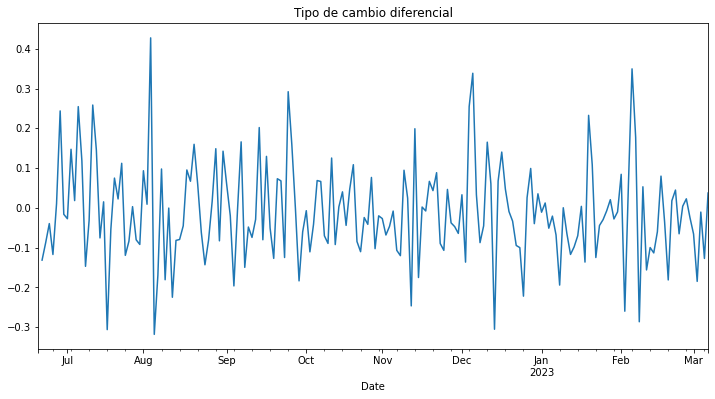

In [ ]:
# graficamos esta nueva serie
tipo_cambio['tipo_diff'].plot()
plt.title('Tipo de cambio diferencial')
plt.show()


Para determinar que tipo de proceso es recurriremos:

* Funcion de autocorrelación ACF
* Funcion de autocorrelación Parcial PACF

In [ ]:
tipo_cambio

,tipo_cambio,tipo_diff
Date,,
2022-06-21,20.268499,NaN
2022-06-22,20.136999,-0.131500
2022-06-23,20.049500,-0.087499
2022-06-24,20.009899,-0.039601
2022-06-27,19.892559,-0.117340
...,...,...
2023-03-01,18.300940,-0.065959
2023-03-02,18.115971,-0.184969
2023-03-03,18.105301,-0.010670


Realizamos la prueba de raices unitaria

In [ ]:
result_adf = adfuller(tipo_cambio['tipo_diff'].dropna())
print('p-value: %.2f' % result_adf[1])

p-value: 0.00


Conclusión
Pvalue=0.00<0.05, rechazamos H0, La serie es estacionaria

si la serie es estacionaria, tratamos de identificar que proceso es para eso vamos a ver si gráfica de autocorrelación y autocorrelación parcial

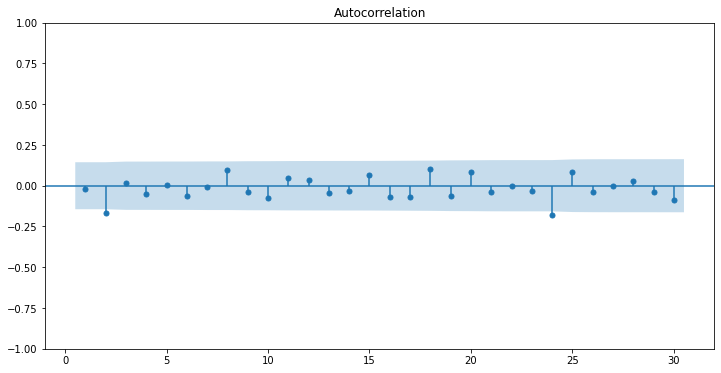

In [ ]:
#plot_acf(serie, zero=False, lags=30);
plot_acf(tipo_cambio['tipo_diff'].dropna(),zero=False, lags=30);

/usr/local/lib/python3.8/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


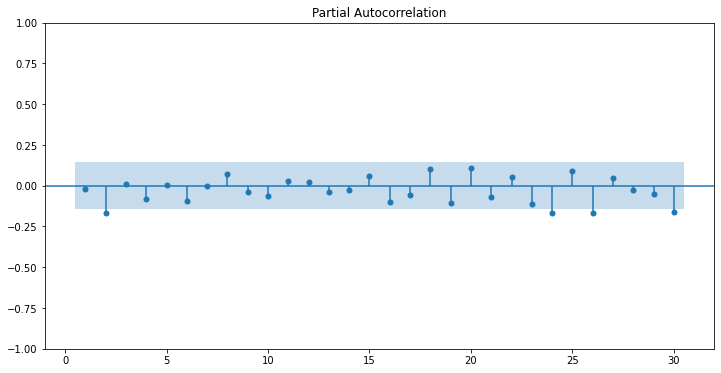

In [ ]:
# autocorrelación parcial PACF
plot_pacf(tipo_cambio['tipo_diff'].dropna(), zero=False, lags=30);

In [ ]:
# plot_pacf(serie, zero = False,  lags=20);
plot_pacf

<function statsmodels.graphics.tsaplots.plot_pacf(x, ax=None, lags=None, alpha=0.05, method=None, use_vlines=True, title='Partial Autocorrelation', zero=True, vlines_kwargs=None, **kwargs)>

Comentarios

In [ ]:
ic = {}
for ar in range(5):
    for ma in range(5):
        print(f"AR: {ar}, MA: {ma}")
        modelo = ARIMA(tipo_cambio['tipo_diff'].dropna(), order=(ar, 0, ma))
        resultado = modelo.fit()
        ic[(ar, ma)] = [resultado.aic, resultado.bic]

ic = pd.DataFrame(ic, index=["AIC", "BIC"]).T
ic.index = ic.index.set_names(["AR", "MA"])
ic

AR: 0, MA: 0


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)


AR: 0, MA: 1


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)


AR: 0, MA: 2


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)


AR: 0, MA: 3


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)


AR: 0, MA: 4


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)


AR: 1, MA: 0


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)


AR: 1, MA: 1


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self.

AR: 1, MA: 2
AR: 1, MA: 3


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)


AR: 1, MA: 4


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)


AR: 2, MA: 0
AR: 2, MA: 1


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, f

AR: 2, MA: 2


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)


AR: 2, MA: 3


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self.

AR: 2, MA: 4


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)


AR: 3, MA: 0
AR: 3, MA: 1


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)


AR: 3, MA: 2


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self.

AR: 3, MA: 3


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)


AR: 3, MA: 4


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)


AR: 4, MA: 0
AR: 4, MA: 1


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)


AR: 4, MA: 2


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self.

AR: 4, MA: 3


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)


AR: 4, MA: 4


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AIC         BIC
AR MA                        
0  0  -247.354601 -240.913889
   1  -245.439253 -235.778186
   2  -249.543075 -236.661651
   3  -247.589465 -231.487686
   4  -246.464787 -227.142652
1  0  -245.411245 -235.750177
   1  -247.840834 -234.959411
   2  -247.691484 -231.589704
   3  -245.942115 -226.619980
   4  -244.581463 -222.038973
2  0  -248.584608 -235.703185
   1  -246.917396 -230.815617
   2  -246.542992 -227.220857
   3  -245.104183 -222.561692
   4  -243.173624 -217.410778
3  0  -246.611752 -230.509973
   1  -245.410147 -226.088012
   2  -245.344357 -222.801866
   3  -246.445684 -220.682837
   4  -243.003070 -214.019867
4  0  -245.896105 -226.573970
   1  -243.895032 -221.352541
   2  -242.757772 -216.994926
   3  -243.904333 -214.921131
   4  -243.594547 -211.390989

vamos a elegir el modelo que tiene "mejor" c riterio de Akaike (AIC). el valor más pequeño

In [ ]:
ic.sort_values('AIC', ascending = True)

AIC         BIC
AR MA                        
0  2  -249.543075 -236.661651
2  0  -248.584608 -235.703185
1  1  -247.840834 -234.959411
   2  -247.691484 -231.589704
0  3  -247.589465 -231.487686
   0  -247.354601 -240.913889
2  1  -246.917396 -230.815617
3  0  -246.611752 -230.509973
2  2  -246.542992 -227.220857
0  4  -246.464787 -227.142652
3  3  -246.445684 -220.682837
1  3  -245.942115 -226.619980
4  0  -245.896105 -226.573970
0  1  -245.439253 -235.778186
1  0  -245.411245 -235.750177
3  1  -245.410147 -226.088012
   2  -245.344357 -222.801866
2  3  -245.104183 -222.561692
1  4  -244.581463 -222.038973
4  3  -243.904333 -214.921131
   1  -243.895032 -221.352541
   4  -243.594547 -211.390989
2  4  -243.173624 -217.410778
3  4  -243.003070 -214.019867
4  2  -242.757772 -216.994926

El criterio de Akaike (AIC) y el criterio bayesiano de información (BIC) nos sirve para elegir el modelo adecuado. 
Elegir solo uno, BIC o AIC.


Ente mas grande es el AIC/BIC es un peor modelo.

de acuerdo con el criterio 

el mejor modelo segun AIC es ARMA(4,4)

el modelo  estimar AR(2)

In [ ]:
modelo1 = ARIMA(tipo_cambio['tipo_diff'].dropna(), order=(4, 0, 4)) ##AR(2)
resultado1 = modelo1.fit() # calcula
print(resultado1.summary() )  #muestra

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:              tipo_diff   No. Observations:                  185
Model:                 ARIMA(4, 0, 4)   Log Likelihood                 131.797
Date:                Wed, 08 Mar 2023   AIC                           -243.595
Time:                        05:15:32   BIC                           -211.391
Sample:                    06-22-2022   HQIC                          -230.543
                         - 03-07-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0116      0.007     -1.759      0.079      -0.024       0.001
ar.L1         -0.3630      0.333     -1.091      0.275      -1.015       0.289
ar.L2         -0.4504      0.328     -1.372      0.1

/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
##realizamos pronóstico
tipo_cambio['tipo_diff_pronosticada'] = resultado1.predict()


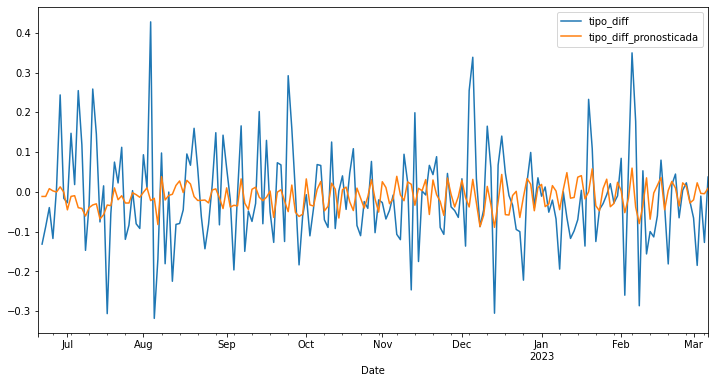

In [ ]:
tipo_cambio[['tipo_diff', 'tipo_diff_pronosticada']].plot();

In [ ]:
modelo2 = ARIMA(tipo_cambio['tipo_cambio'], order=(4, 1, 4)) ##ARIMA(4,1,4)
resultado2 = modelo2.fit() # calcula
print(resultado2.summary() )  #muestra

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:            tipo_cambio   No. Observations:                  186
Model:                 ARIMA(4, 1, 4)   Log Likelihood                 129.821
Date:                Wed, 08 Mar 2023   AIC                           -241.642
Time:                        05:15:42   BIC                           -212.659
Sample:                    06-21-2022   HQIC                          -229.896
                         - 03-07-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5874      0.429     -1.371      0.170      -1.427       0.253
ar.L2         -0.7101      0.487     -1.459      0.145      -1.664       0.244
ar.L3         -0.1148      0.471     -0.244      0.8

/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
#realizamos pronostico
tipo_cambio['tipo_pronosticada']=resultado2.predict()

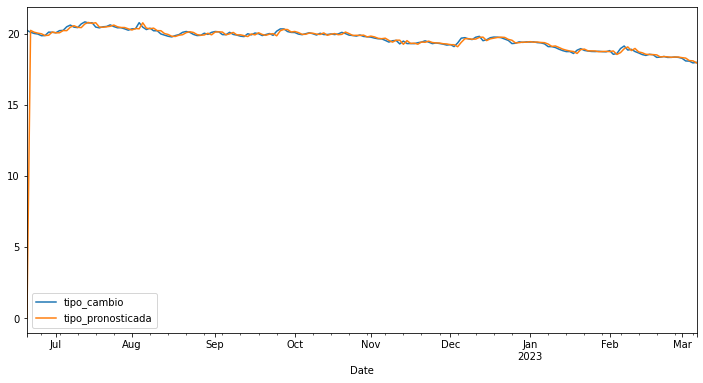

In [ ]:
tipo_cambio[['tipo_cambio','tipo_pronosticada']].plot();

In [ ]:
tipo_cambio.describe()

,tipo_cambio,tipo_diff,tipo_diff_pronosticada,tipo_pronosticada
count,186.000000,185.000000,185.000000,186.000000
mean,19.649711,-0.012180,-0.012052,19.555768
std,0.652909,0.123001,0.030849,1.576242
min,17.978001,-0.318208,-0.089312,0.000000
25%,19.316270,-0.087499,-0.034750,19.296271
50%,19.835165,-0.024401,-0.012244,19.837123
75%,20.102237,0.058892,0.009955,20.097238
max,20.866461,0.427410,0.059659,20.824254


In [ ]:
resultado2.predict(186, 204)

2023-03-08    18.061730
2023-03-09    18.055736
2023-03-10    18.048964
2023-03-13    18.046862
2023-03-14    18.068315
2023-03-15    18.056087
2023-03-16    18.046135
2023-03-17    18.057536
2023-03-20    18.066098
2023-03-21    18.050247
2023-03-22    18.049020
2023-03-23    18.063620
2023-03-24    18.060445
2023-03-27    18.047068
2023-03-28    18.055115
2023-03-29    18.064871
2023-03-30    18.053958
2023-03-31    18.048284
2023-04-03    18.060792
Freq: B, Name: predicted_mean, dtype: float64

El modelo pronostica que para el 3 de abril del 2023 el dolar tendra un valor de 18.060792. 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
